## Combine distributed simulation output files into one dataframe

In [1]:
import os
import pandas as pd
import numpy as np
from constants import HEADER_NAME, ENCODINGDB, REPORTDAYS, FIRST_ROW_AFTER_BURNIN

In [2]:
import matplotlib.pyplot as plt

In [3]:
from constants import ALL_TARGETED_5_TYPES_SET, \
  TARGETED_TYPE1_TRI_LIST, \
  TARGETED_TYPE2_TRI_LIST, \
  TARGETED_TYPE3_DP_DOUBLE_LIST, \
  TARGETED_TYPE4_ASAQ_FULLDOUBLE_LIST, \
  TARGETED_TYPE5_AL_FULLDOUBLE_LIST

In [4]:
def construct_medium_df_for_one_specific_setup(setnum, strategy, interrupted_feeding, ifImportation):
  if_imp_folder = 'with_importation' if ifImportation else 'no_importation'
  fdir_path = f'simulation_outputs/{if_imp_folder}/{interrupted_feeding}/set{setnum}/{strategy}'
  final_result = []
  for i in range(1,101):
    df = pd.read_csv(
      os.path.join(fdir_path, f'monthly/{i}.txt'),
      index_col=False,
      names=HEADER_NAME,
      sep='\t'
    ).fillna(0)
    assert df.shape == (361, 283)
    final_result.append(df[ENCODINGDB].T.values)
  final_result = np.stack(final_result)
  assert(final_result.shape == (100, 128, 361))
  onecase_fulldf = pd.DataFrame(
    (((y,) for y in x) for x in final_result), 
    columns=ENCODINGDB
  )
  onecase_fulldf.insert(0, 'Have Importation', ifImportation)
  onecase_fulldf.insert(0, 'Interrupted Feeding', interrupted_feeding)
  onecase_fulldf.insert(0, 'Treatment Strategy', strategy)
  onecase_fulldf.insert(0, 'Set Alias Number', setnum)
  return onecase_fulldf

In [5]:
list_of_medium_dfs = []
for setnum in [3,4,7,8,11,12]:
  for strategy in ['5_yr_cycling', 'adaptive_cycling', 'mft']:
    for interrupted_feeding in ['0p0', '0p05', '0p1', '0p15', '0p2']:
      for ifImportation in [False, True]:
        ans = construct_medium_df_for_one_specific_setup(
          setnum, strategy, interrupted_feeding, ifImportation
        )
        list_of_medium_dfs.append(ans)

In [6]:
final_ans_one_big_df = pd.concat(list_of_medium_dfs)

In [5]:
# final_ans_one_big_df.to_csv('organized_monthly_outputs_all_combined.csv', index=False)

In [7]:
final_ans_one_big_df

,Set Alias Number,Treatment Strategy,Interrupted Feeding,Have Importation,KNY--C1x,KNY--C1X,KNY--C2x,KNY--C2X,KNY--Y1x,KNY--Y1X,...,TNFNFY2x,TNFNFY2X,TYFYFC1x,TYFYFC1X,TYFYFC2x,TYFYFC2X,TYFYFY1x,TYFYFY1X,TYFYFY2x,TYFYFY2X
0,3,5_yr_cycling,0p0,False,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,3,5_yr_cycling,0p0,False,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,3,5_yr_cycling,0p0,False,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,3,5_yr_cycling,0p0,False,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,3,5_yr_cycling,0p0,False,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

## Helper functions to make plots

In [22]:
def calc_after_burnin_auc_from_list(summed_genofreq_list):
  from constants import REPORTDAYS
  FIRST_ROW_AFTER_BURNIN = 120
  import numpy as np
  if len(summed_genofreq_list) == len(REPORTDAYS): # data includes burn-in
    no_burnin_summed_genofreq_list = summed_genofreq_list[FIRST_ROW_AFTER_BURNIN:]
  else:
    assert(len(summed_genofreq_list) == len(REPORTDAYS[FIRST_ROW_AFTER_BURNIN:]))
    no_burnin_summed_genofreq_list = summed_genofreq_list
  return np.trapz(
    no_burnin_summed_genofreq_list,
    x=REPORTDAYS[FIRST_ROW_AFTER_BURNIN:]
  )

In [23]:
def calc_100_auc_or_t_until_n_values_for_one_strategy_with_selected_genotypes(
  df_with_one_strategy, 
  selected_genotypes, 
  auc_or_t_until_n_flag, 
  strategy_label, 
  t_until_n_never_reach_marker, 
  verbose='off', 
  hide_95_percentile='off'
):
  import numpy as np
  n = 0.01 if (auc_or_t_until_n_flag == 't0p01') else 0.1
  list_of_100_runs_separated_genotype = np.sum(df_with_one_strategy[selected_genotypes], axis=1)
  list_of_100_runs_summed_genotype = np.array(
    [np.array(x).sum(axis=0) for x in list_of_100_runs_separated_genotype]
  )
  assert(list_of_100_runs_summed_genotype.shape == (100,361)) # 100 simulation runs, 361 report data points
  if auc_or_t_until_n_flag == 'auc':
    ans = np.apply_along_axis(calc_after_burnin_auc_from_list, 1, list_of_100_runs_summed_genotype)
  else:
    ans_with_idx = np.apply_along_axis(
      lambda summed_genofreq_list: np.argmax(summed_genofreq_list[FIRST_ROW_AFTER_BURNIN:] >= n), 
      1, 
      list_of_100_runs_summed_genotype
    )
    # convert from index to actual reported days
    ans = [REPORTDAYS[FIRST_ROW_AFTER_BURNIN+x] for x in ans_with_idx]
    # convert to year after burn-in
    ans = np.array(ans) / 365 - 10
    # for never reached scenarios, manually adjust
    ans = np.where(ans == np.inf, t_until_n_never_reach_marker, ans)
  assert(ans.shape == (100,))
  llq,lq,median,uq,uuq = np.percentile(ans, [2.5,25,50,75,97.5])
  if hide_95_percentile == 'on': llq, uuq = lq, uq
  box_one_strategy = {
    'label' : strategy_label,
    'whislo': llq,
    'q1'    : lq,
    'med'   : median,
    'q3'    : uq,
    'whishi': uuq,
    'fliers': []    
  }
  if verbose == 'on': # print out results
    print('{:7.2f} ({:7.2f}-{:7.2f})'.format(median, lq, uq))
  return ans, box_one_strategy

In [17]:
def calc_one_setting_with_three_strategies_box_plot_with_selected_genotypes(
  df_with_three_strategies,
  selected_genotypes,
  auc_or_t_until_n_flag,
  t_until_n_never_reach_marker,
  strategy_label_leading_string='',
  hide_95_percentile='off',
  verbose='off'
):

  if verbose == 'on': print('MFT')
  anses_m, box_m = calc_100_auc_or_t_until_n_values_for_one_strategy_with_selected_genotypes(
    df_with_three_strategies[
      df_with_three_strategies['Treatment Strategy'] == 'mft'
    ],
    selected_genotypes,
    auc_or_t_until_n_flag,
    strategy_label_leading_string+'MFT',
    t_until_n_never_reach_marker, 
    verbose=verbose,
    hide_95_percentile=hide_95_percentile
  )
  if verbose == 'on': print('5-Year Cycling')
  anses_c, box_c = calc_100_auc_or_t_until_n_values_for_one_strategy_with_selected_genotypes(
    df_with_three_strategies[
      df_with_three_strategies['Treatment Strategy'] == '5_yr_cycling'
    ],
    selected_genotypes,
    auc_or_t_until_n_flag,
    strategy_label_leading_string+'5-Year Cycling',
    t_until_n_never_reach_marker, 
    verbose=verbose,
    hide_95_percentile=hide_95_percentile
  )
  if verbose == 'on': print('Adaptive Cycling')
  anses_ac, box_ac = calc_100_auc_or_t_until_n_values_for_one_strategy_with_selected_genotypes(
    df_with_three_strategies[
      df_with_three_strategies['Treatment Strategy'] == 'adaptive_cycling'
    ],
    selected_genotypes,
    auc_or_t_until_n_flag,
    strategy_label_leading_string+'Adaptive Cycling',
    t_until_n_never_reach_marker, 
    verbose=verbose,
    hide_95_percentile=hide_95_percentile
  )
  return [box_m, box_c, box_ac]

In [18]:
def plot_one_set_alias_across_iif_settings(
  ax,
  df_with_one_set_alias_multiple_iifs,
  selected_genotypes,
  auc_or_t_until_n_flag,
  t_until_n_never_reach_marker=None,
  verbose='off',
  hide_95_percentile='off',
  df_with_three_strategies_descriptor_dict=None
):
  from itertools import cycle
  assert(auc_or_t_until_n_flag in ['auc', 't0p01', 't0p1'])
  if auc_or_t_until_n_flag != 'auc': assert(t_until_n_never_reach_marker is not None)
  assert(verbose in ['off', 'on'])
  assert(hide_95_percentile in ['off', 'on'])
  
  if verbose == 'on': print(f'METRIC={auc_or_t_until_n_flag}')
  box_plot_data_across_iif = []
  for interrupted_feeding in ['0p0', '0p05', '0p1', '0p15', '0p2']:
    df_with_three_strategies = df_with_one_set_alias_multiple_iifs[
      df_with_one_set_alias_multiple_iifs['Interrupted Feeding'] == interrupted_feeding
    ]
    if verbose == 'on': print(f'***interrupted_feeding={interrupted_feeding}***')
    box_plot_data_one_iif = calc_one_setting_with_three_strategies_box_plot_with_selected_genotypes(
      df_with_three_strategies,
      selected_genotypes,
      auc_or_t_until_n_flag,
      t_until_n_never_reach_marker,
      strategy_label_leading_string=interrupted_feeding+',',
      verbose=verbose,
      hide_95_percentile=hide_95_percentile
    )
    box_plot_data_across_iif.extend(box_plot_data_one_iif)
  
    bplot = ax.bxp(
      box_plot_data_across_iif, 
      showfliers=False, 
      vert=False, 
      patch_artist=True,
      medianprops=dict(color='k')
    )
    colors = ['#cadab0', '#a6cfd8', '#d1a29b'] # green, blue, coral
    for patch, color in zip(bplot['boxes'], cycle(colors)):
      patch.set_facecolor(color)

## Main plottings

In [19]:
filtered_df = final_ans_one_big_df[
  (final_ans_one_big_df['Set Alias Number'] == 7)
  & (final_ans_one_big_df['Have Importation'] == True)
]

***interrupted_feeding=0p0***
MFT
  16.39 (  14.04-  18.27)
5-Year Cycling
  16.35 (  15.58-  17.27)
Adaptive Cycling
   8.34 (   7.24-   9.12)
***interrupted_feeding=0p05***
MFT
  14.35 (  13.26-  15.12)
5-Year Cycling
  15.18 (  13.20-  15.77)
Adaptive Cycling
   7.93 (   7.08-   9.51)
***interrupted_feeding=0p1***
MFT
  11.85 (  11.18-  12.45)
5-Year Cycling
  11.68 (   9.83-  13.64)
Adaptive Cycling
   8.18 (   7.32-   9.03)
***interrupted_feeding=0p15***
MFT
  10.01 (   9.51-  10.51)
5-Year Cycling
   9.34 (   8.51-  10.20)
Adaptive Cycling
   7.80 (   6.85-   8.68)
***interrupted_feeding=0p2***
MFT
   8.89 (   8.51-   9.34)
5-Year Cycling
   8.43 (   7.85-   9.43)
Adaptive Cycling
   7.26 (   6.57-   8.51)


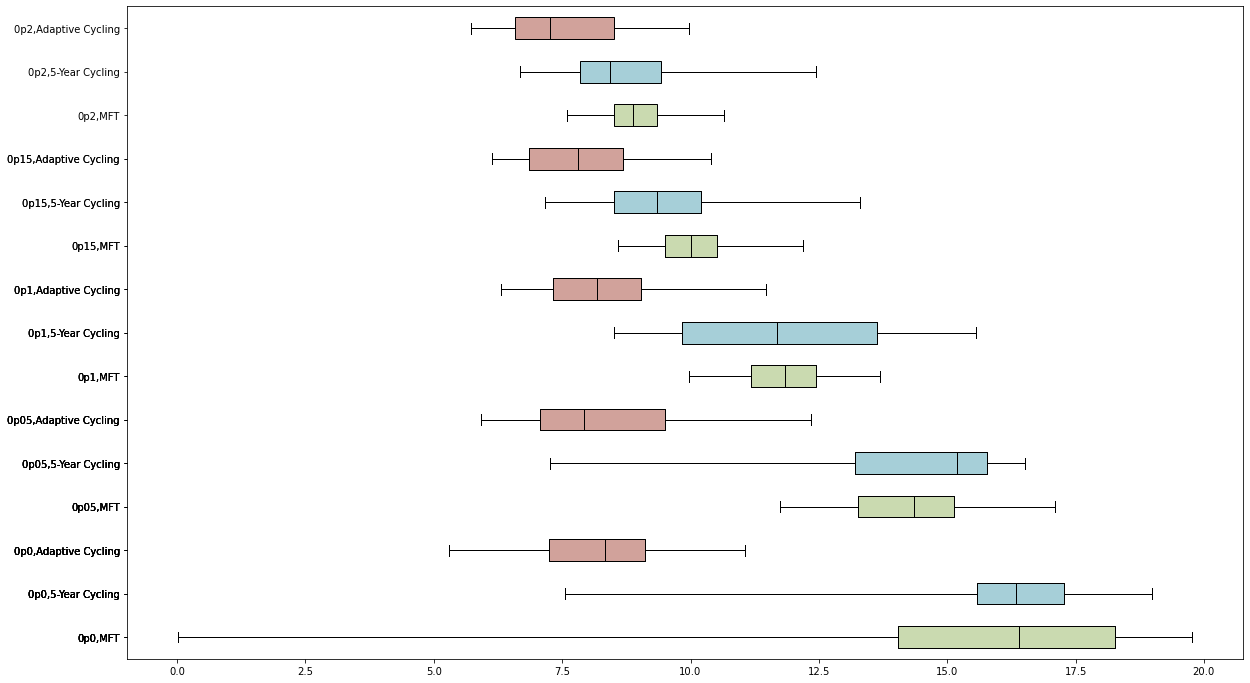

In [20]:
plt.rcParams['figure.figsize'] = [20, 12]
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plot_one_set_alias_across_iif_settings(
  ax,
  filtered_df,
  TARGETED_TYPE1_TRI_LIST,
  't0p01',
  20.1,
  verbose='on'
)

***interrupted_feeding=0p0***
MFT
  22.38 (  11.63-  43.44)
5-Year Cycling
  78.35 (  40.41- 135.21)
Adaptive Cycling
 308.25 ( 221.89- 391.77)
***interrupted_feeding=0p05***
MFT
  81.24 (  57.96- 105.56)
5-Year Cycling
 148.05 ( 106.17- 195.10)
Adaptive Cycling
 252.79 ( 200.70- 314.96)
***interrupted_feeding=0p1***
MFT
 201.18 ( 163.97- 245.23)
5-Year Cycling
 245.90 ( 201.92- 287.40)
Adaptive Cycling
 252.21 ( 231.76- 299.52)
***interrupted_feeding=0p15***
MFT
 346.29 ( 306.88- 391.98)
5-Year Cycling
 349.42 ( 291.22- 394.01)
Adaptive Cycling
 295.69 ( 259.45- 321.90)
***interrupted_feeding=0p2***
MFT
 468.98 ( 416.26- 518.35)
5-Year Cycling
 422.93 ( 354.10- 464.40)
Adaptive Cycling
 335.96 ( 294.44- 358.60)


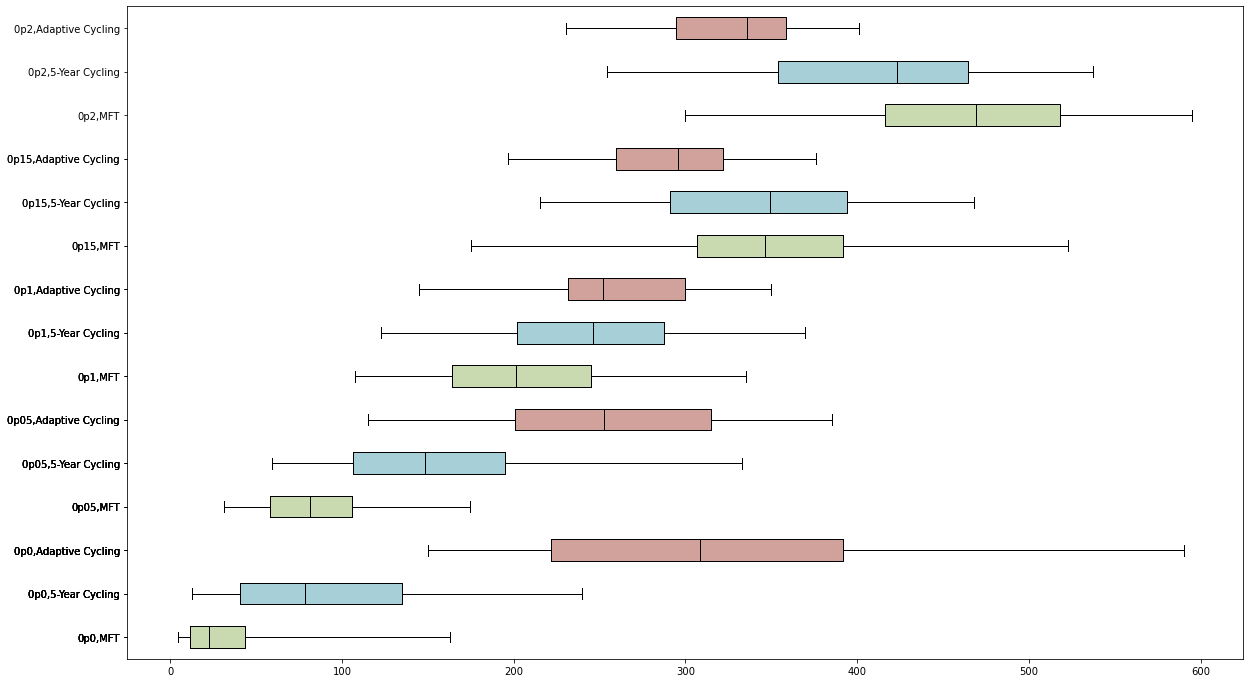

In [24]:
plt.rcParams['figure.figsize'] = [20, 12]
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plot_one_set_alias_across_iif_settings(
  ax,
  filtered_df,
  TARGETED_TYPE1_TRI_LIST,
  'auc',
  verbose='on'
)

IMPORTATION FLAG=True
TARGET GENOTYPES=ALL_TARGETED_5_TYPES_SET
SET ALIAS=3
***interrupted_feeding=0p0***
MFT
   0.01 (   0.01-   0.01)
5-Year Cycling
   0.01 (   0.01-   0.01)
Adaptive Cycling
  14.94 (  12.14-  16.27)
***interrupted_feeding=0p05***
MFT
  13.85 (   0.01-  16.98)
5-Year Cycling
  15.64 (   0.01-  17.83)
Adaptive Cycling
  13.60 (  10.97-  15.64)
***interrupted_feeding=0p1***
MFT
  13.14 (  11.22-  15.04)
5-Year Cycling
  15.06 (  12.14-  16.37)
Adaptive Cycling
  12.81 (  11.24-  14.77)
***interrupted_feeding=0p15***
MFT
  10.72 (   9.24-  12.45)
5-Year Cycling
  11.85 (  10.08-  14.54)
Adaptive Cycling
  11.26 (   9.93-  13.18)
***interrupted_feeding=0p2***
MFT
   9.01 (   7.97-  10.37)
5-Year Cycling
   9.26 (   8.47-  10.64)
Adaptive Cycling
  10.01 (   8.66-  11.60)

SET ALIAS=7
***interrupted_feeding=0p0***
MFT
  12.51 (  10.66-  13.79)
5-Year Cycling
   8.89 (   7.13-  11.51)
Adaptive Cycling
   6.85 (   5.93-   7.45)
***interrupted_feeding=0p05***
MFT
   9.80 ( 

Text(0, 0.5, 'PfPR = 20%')

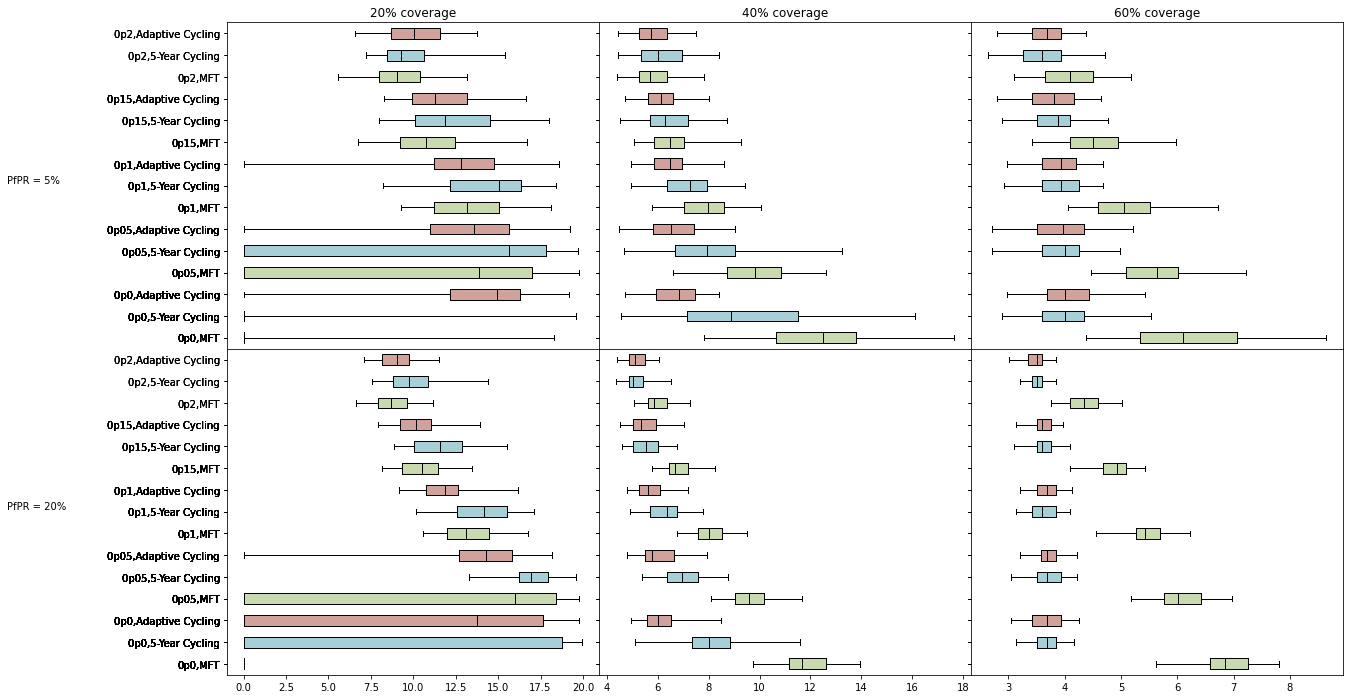

In [26]:
plt.rcParams['figure.figsize'] = [20, 12]
fig, axes = plt.subplots(2, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
fig.patch.set_facecolor('white')
ax_row1, ax_row2 = axes

hide_95_percentile='off'
verbose='on'
have_importation_flag = True
target_genotype_list, target_genotype_list_verbose = ALL_TARGETED_5_TYPES_SET, 'ALL_TARGETED_5_TYPES_SET'

if verbose == 'on': print(f'IMPORTATION FLAG={have_importation_flag}')
if verbose == 'on': print(f'TARGET GENOTYPES={target_genotype_list_verbose}')
for (set_alias, ax_idx) in zip([3,7,11], [0,1,2]):
  if verbose == 'on': print(f'SET ALIAS={set_alias}')
  filtered_df_one_alias_importation_setting = final_ans_one_big_df[
    (final_ans_one_big_df['Set Alias Number'] == set_alias)
    & (final_ans_one_big_df['Have Importation'] == have_importation_flag)
  ]
  plot_one_set_alias_across_iif_settings(
    ax_row1[ax_idx],
    filtered_df_one_alias_importation_setting,
    target_genotype_list,
    't0p01',
    20.1,
    verbose=verbose,
    hide_95_percentile=hide_95_percentile
  )
  if verbose == 'on': print()

for (set_alias, ax_idx) in zip([4,8,12], [0,1,2]):
  if verbose == 'on': print(f'SET ALIAS={set_alias}')
  filtered_df_one_alias_importation_setting = final_ans_one_big_df[
    (final_ans_one_big_df['Set Alias Number'] == set_alias)
    & (final_ans_one_big_df['Have Importation'] == have_importation_flag)
  ]
  plot_one_set_alias_across_iif_settings(
    ax_row2[ax_idx],
    filtered_df_one_alias_importation_setting,
    target_genotype_list,
    't0p01',
    20.1,
    verbose=verbose,
    hide_95_percentile=hide_95_percentile
  )
  if verbose == 'on': print()

axes[0][0].set_title('20% coverage')
axes[0][1].set_title('40% coverage')
axes[0][2].set_title('60% coverage')
axes[0][0].set_ylabel('PfPR = 5%', multialignment='left', 
                     horizontalalignment='left', rotation=0, 
                     labelpad=100)
axes[1][0].set_ylabel('PfPR = 20%', multialignment='left', 
                     horizontalalignment='left', rotation=0, 
                     labelpad=100)